In [13]:
#mushroom data set decision tree
import pandas as pd
import numpy as np
import sklearn as sl
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz
clf = tree.DecisionTreeClassifier()
mushroom_dataframe = pd.read_csv(f"./mushrooms.csv", delimiter = ';')
mushroom_dataframe.head()

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,...,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [2]:
mushroom_dataframe.columns

Index(['class', 'cap_diameter', 'cap_shape', 'cap_surface', 'cap_color',
       'does_bruise_or_bleed', 'gill_attachment', 'gill_spacing', 'gill_color',
       'stem_height', 'stem_width', 'stem_root', 'stem_surface', 'stem_color',
       'veil_type', 'veil_color', 'has_ring', 'ring_type', 'spore_print_color',
       'habitat', 'season'],
      dtype='object')

In [3]:
mushroom_dataframe = mushroom_dataframe.rename(columns={'class':"class", 'cap-diameter':"cap_diameter", 'cap-shape':"cap_shape", 'cap-surface':"cap_surface", 'capcolor':"cap_color", 
'does-bruise-or-bleed':"does_bruise_or_bleed", 'gill-attachment':"gill_attachment", 'gill-spacing':"gill_spacing", 'gill-color':"gill_color", 'stemheight':"stem_height", 
'stem-width':"stem_width", 'stem-root':"stem_root", 'stem-surface':"stem_surface", 'stem-color':"stem_color", 'veil-type':"veil_type", 'veilcolor':"veil_color", 
'has-ring':"has_ring", 'ring-type':"ring_type", 'spore-print-color':"Spore_print_color", 'habitat':"habitat", 'season':"season"})

In [4]:
mushroomDf = mushroom_dataframe.drop("class", axis=1)
mushroomDf

,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,stem_width,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,s,y,f,f,f,f,3.93,6.22,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,1.27,f,s,y,f,f,f,f,3.18,5.43,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,1.27,s,s,y,f,f,f,f,3.86,6.37,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,1.24,f,s,y,f,f,f,f,3.56,5.44,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [5]:
mushroomDf.cap_shape=mushroom_dataframe.cap_shape.astype('category').cat.codes
mushroomDf.cap_surface=mushroom_dataframe.cap_surface.astype('category').cat.codes
mushroomDf.cap_color=mushroom_dataframe.cap_color.astype('category').cat.codes
mushroomDf.gill_attachment=mushroom_dataframe.gill_attachment.astype('category').cat.codes
mushroomDf.does_bruise_or_bleed=mushroom_dataframe.does_bruise_or_bleed.astype('category').cat.codes
mushroomDf.gill_spacing=mushroom_dataframe.gill_spacing.astype('category').cat.codes
mushroomDf.gill_color=mushroom_dataframe.gill_color.astype('category').cat.codes
mushroomDf.stem_root=mushroom_dataframe.stem_root.astype('category').cat.codes
mushroomDf.stem_surface=mushroom_dataframe.stem_surface.astype('category').cat.codes
mushroomDf.stem_color=mushroom_dataframe.stem_color.astype('category').cat.codes
mushroomDf.veil_type=mushroom_dataframe.veil_type.astype('category').cat.codes
mushroomDf.veil_color=mushroom_dataframe.veil_color.astype('category').cat.codes
mushroomDf.has_ring=mushroom_dataframe.has_ring.astype('category').cat.codes
mushroomDf.ring_type=mushroom_dataframe.ring_type.astype('category').cat.codes
mushroomDf.spore_print_color=mushroom_dataframe.spore_print_color.astype('category').cat.codes
mushroomDf.habitat=mushroom_dataframe.habitat.astype('category').cat.codes
mushroomDf.season=mushroom_dataframe.season.astype('category').cat.codes
mushroomDf

,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,stem_width,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season
0,15.26,6,2,6,0,2,-1,10,16.95,17.09,4,7,11,0,4,1,2,-1,0,3
1,16.60,6,2,6,0,2,-1,10,17.99,18.19,4,7,11,0,4,1,2,-1,0,2
2,14.07,6,2,6,0,2,-1,10,17.80,17.74,4,7,11,0,4,1,2,-1,0,3
3,14.17,2,3,1,0,2,-1,10,15.77,15.98,4,7,11,0,4,1,5,-1,0,3
4,14.64,6,3,6,0,2,-1,10,16.53,17.20,4,7,11,0,4,1,5,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,5,7,11,0,3,2,2,3.93,6.22,-1,-1,12,-1,-1,0,1,-1,0,0
61065,1.27,2,7,11,0,3,2,2,3.18,5.43,-1,-1,12,-1,-1,0,1,-1,0,0
61066,1.27,5,7,11,0,3,2,2,3.86,6.37,-1,-1,12,-1,-1,0,1,-1,0,2
61067,1.24,2,7,11,0,3,2,2,3.56,5.44,-1,-1,12,-1,-1,0,1,-1,0,2


In [6]:
df_label = mushroom_dataframe["class"].copy()
y=np.ravel(df_label)
y

array(['p', 'p', 'p', ..., 'p', 'p', 'p'], dtype=object)

In [7]:
#check if dataset label are balanced
df_label.value_counts()
x_train, x_test, y_train, y_test = train_test_split(mushroomDf,y, test_size = 0.5, random_state=50)

[Text(0.5759791666666667, 0.975, 'X[9] <= 8.225\ngini = 0.494\nsamples = 30534\nvalue = [13560, 16974]'),
 Text(0.33516666666666667, 0.925, 'X[6] <= 0.5\ngini = 0.426\nsamples = 12976\nvalue = [3992, 8984]'),
 Text(0.21366666666666667, 0.875, 'X[2] <= 3.5\ngini = 0.364\nsamples = 10178\nvalue = [2432, 7746]'),
 Text(0.09133333333333334, 0.825, 'X[1] <= 0.5\ngini = 0.446\nsamples = 5152\nvalue = [1730, 3422]'),
 Text(0.038, 0.775, 'X[8] <= 3.675\ngini = 0.179\nsamples = 958\nvalue = [95, 863]'),
 Text(0.027333333333333334, 0.725, 'X[12] <= 8.5\ngini = 0.13\nsamples = 100\nvalue = [93, 7]'),
 Text(0.022, 0.675, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.03266666666666666, 0.675, 'gini = 0.0\nsamples = 93\nvalue = [93, 0]'),
 Text(0.048666666666666664, 0.725, 'X[8] <= 3.765\ngini = 0.005\nsamples = 858\nvalue = [2, 856]'),
 Text(0.043333333333333335, 0.675, 'X[7] <= 4.0\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.038, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),


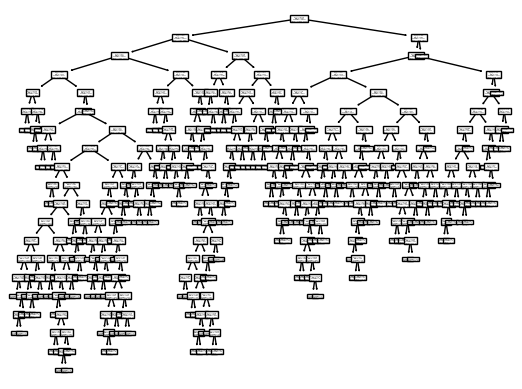

In [8]:
clf = clf.fit(x_train, y_train)
tree.plot_tree(clf)

In [9]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("mushrooms")

'mushrooms.pdf'

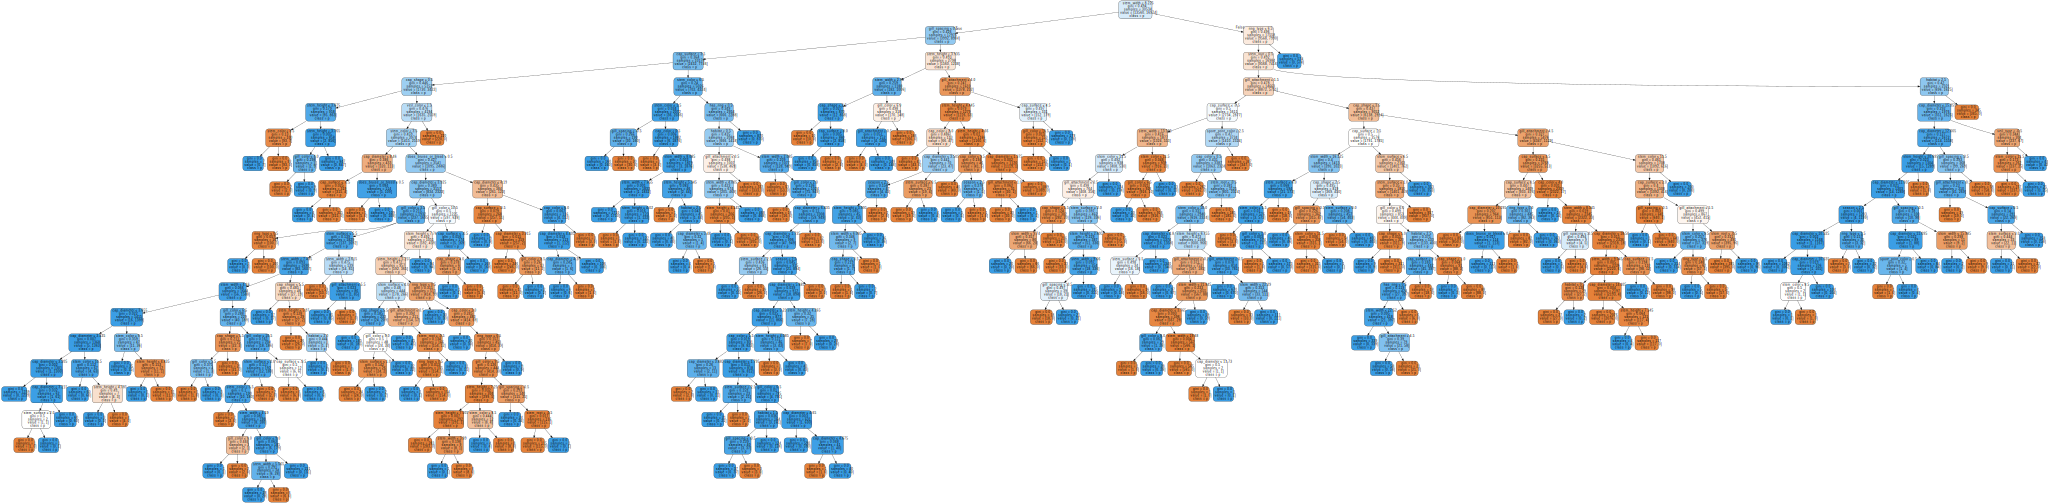

In [10]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=mushroomDf.columns.tolist(),class_names=y,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [11]:
test_pred_decision_tree = clf.predict(x_test)

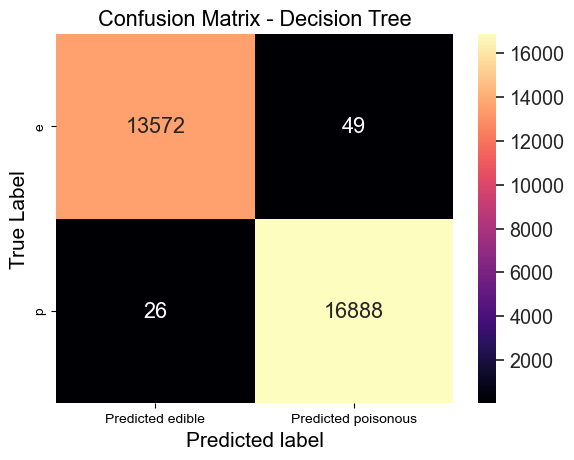

<Figure size 1000x700 with 0 Axes>

In [12]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,test_pred_decision_tree, labels=["e","p"])
matrix_df = pd.DataFrame(confusion_matrix, index=['e', 'p'], columns=['Predicted edible', 'Predicted poisonous'])
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()